In [1]:
your_name = "Myles Sartor"
your_uid = "119017708"

# Assignment 2: Data Manipulation and Pattern Analysis

## Course: INST447 - Data Sources and Manipulation

### Learning Objectives
In this assignment, you will practice:
- Exploring and understanding dataset structure
- Identifying and fixing data quality issues
- Aggregating data with groupby-aggregation operations
- Reshaping tables with pivot to compare data across time periods
- Analyzing text patterns with regular expressions
- Creating informative visualizations
- Using AI tools effectively for data analysis

### Dataset: Popular Baby Names in NYC (2011-2021)

We are going to use a dataset that tracks the most popular baby names in New York City from 2011 to 2021. The dataset includes information about each baby's name, gender, ethnicity, and how many babies received that name in each year.

### Note on AI Assistance
You are **encouraged** to use AI assistants (ChatGPT, Claude, Copilot, etc.) to help you complete this assignment. In the final question, you'll reflect on how you used these tools and what you learned.

---

## Setup: Load Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/aiwei/course-umd/main/data/Popular_Baby_Names_20250925.csv')
df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


---

## Question 1: Data Exploration and Quality Check (20 points)

Before analyzing data, **let's first** understand its structure and identify any quality issues!

### Part A: Basic Exploration (5 points)

Answer these questions:
1. How many rows and columns?
2. What years are covered? (min and max)
3. How many unique baby names?

In [4]:
# YOUR CODE HERE

print(f"1. {df.shape[0]} rows, {df.shape[1]} columns")
print(f"2. Years {df['Year of Birth'].min()} to {df['Year of Birth'].max()}")
unique_names = df['Child\'s First Name'].nunique()
print(f"3. {unique_names} unique names")


1. 77287 rows, 6 columns
2. Years 2011 to 2021
3. 3302 unique names


**Answers:**
1. ___ rows, ___ columns
2. Years ___ to ___
3. ___ unique names

### Part B: Data Quality Check - Ethnicity (7 points)

**Task:** Check the `Ethnicity` column for inconsistencies.

1. Display all unique ethnicity values
2. Do you notice any inconsistencies? (abbreviated vs. full names?)
3. Fix the inconsistencies by replacing all abbreviated names with their full names

**Hint:** You may see both "ASIAN AND PACI" and "ASIAN AND PACIFIC ISLANDER" - these should be the same!

In [5]:
# YOUR CODE HERE - Check ethnicity values
print("Unique ethnicity values:")
print(df['Ethnicity'].unique())

Unique ethnicity values:
['HISPANIC' 'WHITE NON HISPANIC' 'ASIAN AND PACIFIC ISLANDER'
 'BLACK NON HISPANIC' 'ASIAN AND PACI' 'BLACK NON HISP' 'WHITE NON HISP']


In [6]:
# YOUR CODE HERE - Fix ethnicity inconsistencies
ethnicity_mapping = {
    'ASIAN AND PACI': 'ASIAN AND PACIFIC ISLANDER',
    'BLACK NON HISP': 'BLACK NON HISPANIC', 
    'WHITE NON HISP': 'WHITE NON HISPANIC'
}
df['Ethnicity'] = df['Ethnicity'].replace(ethnicity_mapping)

print("After fixing ethnicity:")
print(df['Ethnicity'].unique())


After fixing ethnicity:
['HISPANIC' 'WHITE NON HISPANIC' 'ASIAN AND PACIFIC ISLANDER'
 'BLACK NON HISPANIC']


You may have also noticed there are duplicate rows in the dataset. Let's remove duplicates before moving to the next task.

In [7]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape[0]} rows")

After removing duplicates: 21612 rows


### Part C: Data Quality Check - Name Case Inconsistency (8 points)

**Problem:** Did you notice that some names appear in different cases?

For example, in the top rows you may have seen "GERALDINE" (all caps), while other names appear as "Sophia" (title case). Let's see what happens when we try to pivot data with inconsistent case!

In [8]:
sophia_subset = df[
    (df['Child\'s First Name'].str.lower() == 'sophia') &
    (df['Year of Birth'].isin([2011, 2012, 2013, 2014])) &
    (df['Gender'] == 'FEMALE') &
    (df['Ethnicity'] == 'HISPANIC')
]

print("\nData for Sophia/SOPHIA in Hispanic group (2011-2014):")
print(sophia_subset[['Year of Birth', 'Child\'s First Name', 'Count']].sort_values('Year of Birth'))

print("\nNotice: 2011-2012 use 'SOPHIA' (all caps), but 2013-2014 use 'Sophia' (title case)!")
print("\nNow let's try to pivot this data to compare years side-by-side:")

# This will create a problematic result!
result = sophia_subset.pivot(
    index='Child\'s First Name',
    columns='Year of Birth',
    values='Count'
)
print(result)
print("\nProblem: 'SOPHIA' and 'Sophia' are treated as DIFFERENT names!")
print("We get two separate rows with NaN values instead of one complete row.")


Data for Sophia/SOPHIA in Hispanic group (2011-2014):
       Year of Birth Child's First Name  Count
182             2011             SOPHIA    223
4582            2012             SOPHIA    236
7989            2013             Sophia    291
13857           2014             Sophia    259

Notice: 2011-2012 use 'SOPHIA' (all caps), but 2013-2014 use 'Sophia' (title case)!

Now let's try to pivot this data to compare years side-by-side:
Year of Birth        2011   2012   2013   2014
Child's First Name                            
SOPHIA              223.0  236.0    NaN    NaN
Sophia                NaN    NaN  291.0  259.0

Problem: 'SOPHIA' and 'Sophia' are treated as DIFFERENT names!
We get two separate rows with NaN values instead of one complete row.


**Your Task:**

Now that you've seen the problem, let's fix it! Standardize all names to **[Title Case](https://en.wikipedia.org/wiki/Title_case)** using the `.str.title()` method.

Title case means: First letter uppercase, rest lowercase (e.g., "Sophia", "Emma", "Olivia")

This will ensure that "SOPHIA", "sophia", and "Sophia" all become "Sophia".

In [9]:
# YOUR CODE HERE - Standardize names to title case
df['Child\'s First Name'] = df['Child\'s First Name'].str.title()



Now let's verify the fix and check if all names are now in title case.
**IMPORTANT**: Our later exercises are designed based on the assumption that all names have been standardized, and failing to standardize all names may result issues with later questions. We have designed the following cells to verify if standardization has been perform successfully. 

In [10]:
# Verify the fix - check if all names are now in title case
# First check: are there any names that are NOT in title case?
not_title_case = df[df['Child\'s First Name'] != df['Child\'s First Name'].str.title()]

if len(not_title_case) > 0:
    print("⚠️  WARNING: NOT ALL NAMES ARE IN TITLE CASE! ⚠️")
    print(f"Found {len(not_title_case)} names that are not in title case.")
    print("This WILL affect the correctness of later exercises!")
    print("\nExample names that are not in title case:")
    print(not_title_case['Child\'s First Name'].head(10).tolist())
    print("\nPlease go back and fix the name standardization!")
else:
    print("✓ All names are in title case!")
    
    # Now verify with the Sophia test
    sophia_subset_fixed = df[
        (df['Child\'s First Name'] == 'Sophia') &
        (df['Year of Birth'].isin([2011, 2012, 2013, 2014])) &
        (df['Gender'] == 'FEMALE') &
        (df['Ethnicity'] == 'HISPANIC')
    ]
    
    print("\nAfter fixing, all names should be 'Sophia':")
    print(sophia_subset_fixed[['Year of Birth', 'Child\'s First Name', 'Count']].sort_values('Year of Birth'))
    
    print("\nNow pivot should work correctly:")
    result = sophia_subset_fixed.pivot(
        index='Child\'s First Name',
        columns='Year of Birth',
        values='Count'
    )
    print(result)

✓ All names are in title case!

After fixing, all names should be 'Sophia':
       Year of Birth Child's First Name  Count
182             2011             Sophia    223
4582            2012             Sophia    236
7989            2013             Sophia    291
13857           2014             Sophia    259

Now pivot should work correctly:
Year of Birth       2011  2012  2013  2014
Child's First Name                        
Sophia               223   236   291   259


**For the rest of the assignment:** We'll use 2011-2014 data, which has the most complete records.

In [11]:
# Create filtered dataset
complete_years = df[df['Year of Birth'].isin([2011, 2012, 2013, 2014])].copy()
print(f"Complete years dataset: {complete_years.shape}")

Complete years dataset: (8073, 6)


---

## Question 2: Aggregation - Universal Names (25 points)

**Motivation:** Which names have universal appeal across ALL ethnicities in NYC?

**Task:** Find names in the **top 20** for ALL ethnic groups in 2014. Analyze girl names and boy names separately since naming patterns differ by gender.

**Your approach:**
1. Filter to year 2014
2. For girl names: Within each ethnicity, find the top 20 girl names by total count (sum across all records for that name within that ethnicity)
3. Find the intersection - which girl names appear in ALL ethnic groups' top 20?
4. Repeat for boy names

**Important note:** This exercise is explicitly designed to expose you to unfamiliar data manipulation operations. During lecture, we did not discuss *finding top k elements within each group*. You may either:
- Look up pandas documentation about `.sort_values()` and `.head()` and figure out how to combine them with `.groupby()`
- Frame this as a question for your AI chatbot (e.g., "How do I find the top 20 names by count for each ethnicity group in pandas?")

**Hint:** The code provided in Question 5 shows an example of groupby-aggregation that you can adapt.

**Expected result:** You should find **3** universal girl names and 2 universal boy names. (An earlier version of the notebook included the wrong number of universal girl names.)

In [12]:
# YOUR CODE HERE

# year 2014
df_2014 = complete_years[complete_years['Year of Birth'] == 2014]

# top 20 girl names for each ethnicity
top_girls_by_ethnicity = {}
girl_names_2014 = df_2014[df_2014['Gender'] == 'FEMALE']

for ethnicity in girl_names_2014['Ethnicity'].unique(): # sum across all recrods for name in ethnicity 
    eth_data = girl_names_2014[girl_names_2014['Ethnicity'] == ethnicity]
    top_names = eth_data.groupby('Child\'s First Name')['Count'].sum().nlargest(20).index.tolist()
    top_girls_by_ethnicity[ethnicity] = set(top_names)

# intersection of all ethnic groups (girl)
universal_girl_names = set.intersection(*top_girls_by_ethnicity.values())

# for boys
top_boys_by_ethnicity = {}
boy_names_2014 = df_2014[df_2014['Gender'] == 'MALE']

for ethnicity in boy_names_2014['Ethnicity'].unique():
    eth_data = boy_names_2014[boy_names_2014['Ethnicity'] == ethnicity]
    top_names = eth_data.groupby('Child\'s First Name')['Count'].sum().nlargest(20).index.tolist()
    top_boys_by_ethnicity[ethnicity] = set(top_names)

# intersection of all ethnic groups (boy)
universal_boy_names = set.intersection(*top_boys_by_ethnicity.values())

print("Universal girl names:", universal_girl_names)
print("Universal boy names:", universal_boy_names)


Universal girl names: {'Olivia', 'Isabella', 'Mia'}
Universal boy names: {'Liam', 'Ethan'}


**Answer:**

Universal girl names: Isabella, Olivia, Mia

Universal boy names: Liam, Ethan

---

## Question 3: Comparison with Pivot - Rising and Falling Stars (25 points)

**Motivation:** Name trends change over time. Let's find the biggest movers using pivot for comparison!

**Task:** Compare 2011 vs 2014 for both genders.

**Requirements:**
1. Pivot the table into "wide" format (names and genders as rows, years as columns, aggregate counts across ethnicities)
2. Filter to names with ≥50 babies in BOTH years
3. Calculate percentage change: `((2014 - 2011) / 2011) * 100`
4. Find top 5 rising and top 5 falling for each gender

In [13]:
# YOUR CODE HERE

# 2011 and 2014
years_comparison = complete_years[complete_years['Year of Birth'].isin([2011, 2014])]

# aggregated counts across ethnicities by name, gender, and year
aggregated = years_comparison.groupby(['Child\'s First Name', 'Gender', 'Year of Birth'])['Count'].sum().reset_index()

# pivot to wide 
pivot_df = aggregated.pivot_table(
    index=['Child\'s First Name', 'Gender'],
    columns='Year of Birth',
    values='Count',
    aggfunc='sum'
).reset_index()

# replaced NaN with 0
pivot_df = pivot_df.fillna(0)

# names with ≥50 babies in BOTH years
filtered = pivot_df[(pivot_df[2011] >= 50) & (pivot_df[2014] >= 50)]

# percentage change ((2014 - 2011) / 2011) * 100)
filtered['percentage_change'] = ((filtered[2014] - filtered[2011]) / filtered[2011]) * 100

# Separate by gender
girls = filtered[filtered['Gender'] == 'FEMALE'].sort_values('percentage_change', ascending=False)
boys = filtered[filtered['Gender'] == 'MALE'].sort_values('percentage_change', ascending=False)

print("Top 5 Rising Girl Names:")
print(girls[['Child\'s First Name', 'percentage_change']].head())
print("\nTop 5 Rising Boy Names:")
print(boys[['Child\'s First Name', 'percentage_change']].head())



Top 5 Rising Girl Names:
Year of Birth Child's First Name  percentage_change
1139                    Penelope         180.769231
198                        Avery         161.538462
1029                        Mila         114.925373
626                     Isabelle          77.777778
1396                      Violet          73.076923

Top 5 Rising Boy Names:
Year of Birth Child's First Name  percentage_change
298                       Carter         203.703704
1358                    Theodore         200.000000
804                       Kayden         129.032258
607                       Hunter         128.571429
641                         Jace         106.896552


/var/folders/p3/729vs9tj48x10t6j15pxvm6c0000gn/T/ipykernel_90665/2109379539.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['percentage_change'] = ((filtered[2014] - filtered[2011]) / filtered[2011]) * 100


**Your Answer:**

Top 5 Rising Girl Names: Penelope, Avery, Mila, Isabelle, Violet

Top 5 Rising Boy Names: Carter, Theodore, Kayden, Hunter, Jace

---

## Question 4: Visualization - Gender Spectrum (15 points + 5 bonus)

**Motivation:** Are names strictly "boy names" or "girl names"? Or is there a spectrum?

Let's visualize the top 200 most popular names to see how gender distribution actually works!

![Basic visualization](https://raw.githubusercontent.com/aiwei/course-umd/main/data/assignment02_fig1.png)

This is a scatter plot in which each dot represents a name, and its x- and y-coordinates indicate its popularity as boy's or girl's names. Dots close to the x- or y-axis indicate that the name is used almost exclusively for one gender, while dots close to the diagonal reference line indicate names with more balanced gender usage. We can see that most popular names ARE strongly gendered - appearing only on the x-axis (boy names only) or y-axis (girl names only). A few names are mixed-gendered but they tend to be not as popular as the pure boy or girl names.

To better highlight these findings, we can add color-coding and labels:

![Enhanced visualization](https://raw.githubusercontent.com/aiwei/course-umd/main/data/assignment02_fig2.png)

Now the mixed-gender names (in purple, with slightly larger dots) really stand out from the pure boy names (blue) and pure girl names (red)!

### Your turn: Reproduce the visualization

Now it's your turn to reproduce this visualization! You can earn **15 points** if you can reproduce the basic scatter plot, and an additional **5 bonus points** if you add the color-coding, labels, and larger dots for mixed-gender names.

**Detailed requirements:**

Create a scatter plot where each dot represents a name. The position of the name is determined by:
- X-axis: Total count for that name used as boy's name (across 2011-2014, all ethnicities)
- Y-axis: Total count for that name used as girl's name (across 2011-2014, all ethnicities)

Additional requirements:
- Include only the top 200 names by total count (boy + girl combined)
- Add a diagonal line (y=x) showing "equal usage" between genders
- Add appropriate title and axis labels
- Add grid for easier reading
- **Optional (for 5 bonus points):** Add color-coding where red = girl-only names (0 boys), blue = boy-only names (0 girls), purple = mixed-gender names; make mixed-gender name dots larger; and label the mixed-gender names with their text

**Step-by-step plan for your reference** (you don't need to strictly follow this):

1. Aggregate count by (name, gender) pair across years 2011-2014 and all ethnicities
2. Pivot the data so that one column shows the boy count and one column shows the girl count for each name
   - Alternatively, you can separately aggregate boy names and girl names, then merge the two DataFrames
3. Fill any NaN values with 0 (for names that appear only as boy or only as girl)
4. Calculate total count = boy count + girl count
5. Get the top 200 names by total count
6. Create scatter plot with `plt.scatter(x=boy_count, y=girl_count)`
7. Add diagonal line: `plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.3)`
8. Add title, axis labels, and grid
9. (Optional for bonus) Determine color and size for each name based on whether it's boy-only, girl-only, or mixed-gender
10. (Optional for bonus) Use `plt.text()` to label mixed-gender names

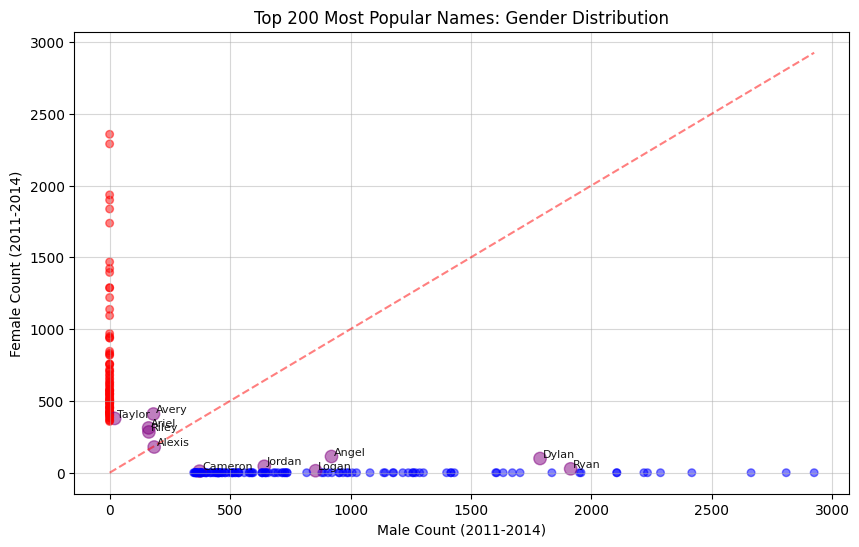

In [14]:
# YOUR CODE HERE - Create the scatter plot
# You can earn full 15 points for the basic version
# Add color-coding and labels for 5 bonus points

# aggregate count by (name, gender) pair
name_gender_counts = complete_years.groupby(['Child\'s First Name', 'Gender'])['Count'].sum().reset_index()

# pivot data to get boy and girl counts for each name
name_counts = name_gender_counts.pivot(
    index='Child\'s First Name', 
    columns='Gender', 
    values='Count'
).fillna(0) # replacing missing values with zero

# total count
name_counts['Total'] = name_counts['FEMALE'] + name_counts['MALE']

# getting top 200 names by total count
top_200 = name_counts.nlargest(200, 'Total')

# colors and sizes for each point color coding
colors = []
sizes = []

for index, row in top_200.iterrows():
    if row['MALE'] == 0:  # girl-only names
        colors.append('red')
        sizes.append(30)
    elif row['FEMALE'] == 0:  # boy-only names
        colors.append('blue') 
        sizes.append(30)
    else:  # mixed-gender names
        colors.append('purple')
        sizes.append(80)  # larger dots

# scatter plot for girl/boy counts with color coding
plt.figure(figsize=(10, 6))
plt.scatter(x=top_200['MALE'], y=top_200['FEMALE'], c=colors, s=sizes, alpha=0.5)

# text labels for mixed-gender names
for name, row in top_200.iterrows():
    if row['MALE'] > 0 and row['FEMALE'] > 0:  # mixed-gender names only
        plt.text(row['MALE'] + 10, row['FEMALE'] + 10, name, fontsize=8, alpha=0.9)

# diagonal line y=x
max_val = max(top_200['MALE'].max(), top_200['FEMALE'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5)

plt.xlabel('Male Count (2011-2014)')
plt.ylabel('Female Count (2011-2014)')
plt.title('Top 200 Most Popular Names: Gender Distribution')
plt.grid(True, alpha=0.5)
plt.show()

---

## Question 5: Regular Expression Pattern Analysis (20 points + 5 bonus)

**Motivation:** After seeing the gender spectrum, let's investigate: Can we predict gender just based on name patterns?

**Setup:** Let's examinine the top 50 names for each gender.

In [15]:
# hint: the groupby-aggregation code below can be adapted for Question 2

top_50_girl = complete_years[
    complete_years['Gender'] == 'FEMALE'
].groupby('Child\'s First Name')['Count'].sum().sort_values(ascending=False).head(50)

top_50_boy = complete_years[
    complete_years['Gender'] == 'MALE'
].groupby('Child\'s First Name')['Count'].sum().sort_values(ascending=False).head(50)

print("Top 50 Girl Names:", list(top_50_girl.index))
print("\nTop 50 Boy Names:", list(top_50_boy.index))

Top 50 Girl Names: ['Sophia', 'Isabella', 'Olivia', 'Emma', 'Mia', 'Emily', 'Leah', 'Madison', 'Chloe', 'Ava', 'Sofia', 'Sarah', 'Abigail', 'Victoria', 'Esther', 'Zoe', 'Ashley', 'Rachel', 'Samantha', 'Elizabeth', 'Maya', 'Gabriella', 'Hailey', 'Ella', 'Grace', 'Chaya', 'Camila', 'Charlotte', 'Kayla', 'Sara', 'Arianna', 'Hannah', 'Amelia', 'Brianna', 'Miriam', 'Alexandra', 'Ariana', 'Chana', 'Kaylee', 'Nicole', 'Eva', 'Angelina', 'Julia', 'Anna', 'Valentina', 'Melanie', 'Lily', 'Evelyn', 'Michelle', 'Layla']

Top 50 Boy Names: ['Jayden', 'Ethan', 'Jacob', 'Daniel', 'Michael', 'Matthew', 'David', 'Alexander', 'Aiden', 'Noah', 'Joseph', 'Ryan', 'Liam', 'Dylan', 'Mason', 'Lucas', 'Joshua', 'Anthony', 'Justin', 'Christopher', 'Benjamin', 'James', 'William', 'Samuel', 'Nicholas', 'Sebastian', 'Andrew', 'Jonathan', 'Aaron', 'Gabriel', 'Kevin', 'Christian', 'John', 'Elijah', 'Brandon', 'Adam', 'Jason', 'Moshe', 'Isaac', 'Jack', 'Nathan', 'Jeremiah', 'Adrian', 'Angel', 'Henry', 'Tyler', 'Julia

### Part A: Test a Simple Pattern (10 points)

**Intuition:** Let's see if "ending with letter 'a'" is a distinctive pattern. To test this, we can use the regular expression `a$` which matches names ending with 'a'.

We can define "distinctiveness" as follows: 

`Distinctiveness = |girl_pct - boy_pct|`

Where:
- `girl_pct` = (girl name matches / 50) × 100
- `boy_pct` = (boy name matches / 50) × 100

Higher distinctiveness = better gender predictor.

**Your Task:**
1. Count how many top 50 girl names end with 'a'
2. Count how many top 50 boy names end with 'a'
3. Calculate percentages
4. Calculate distinctiveness
5. Which gender does this pattern predict?

**Hint:** Use `re.search(r'a$', name)` to test if a name matches.

In [16]:
# YOUR CODE HERE
import re

# top 50 names for each gender
top_50_girl = complete_years[
    complete_years['Gender'] == 'FEMALE'
].groupby('Child\'s First Name')['Count'].sum().sort_values(ascending=False).head(50)

top_50_boy = complete_years[
    complete_years['Gender'] == 'MALE'
].groupby('Child\'s First Name')['Count'].sum().sort_values(ascending=False).head(50)

# names ending with 'a' in top 50 (girls and boys)
girl_names_a = [name for name in top_50_girl.index if re.search(r'a$', name)]
boy_names_a = [name for name in top_50_boy.index if re.search(r'a$', name)]

girl_pct = (len(girl_names_a) / 50) * 100
boy_pct = (len(boy_names_a) / 50) * 100
distinctiveness = abs(girl_pct - boy_pct)

print(f"Girl name matches: {len(girl_names_a)} / 50 ({girl_pct}%)")
print(f"Boy name matches: {len(boy_names_a)} / 50 ({boy_pct}%)")
print(f"Distinctiveness: {distinctiveness}")
print(f"Predicts: {'GIRL' if girl_pct > boy_pct else 'BOY'}")



Girl name matches: 28 / 50 (56.00000000000001%)
Boy name matches: 1 / 50 (2.0%)
Distinctiveness: 54.00000000000001
Predicts: GIRL


**Results for pattern `a$`:**

- Girl name matches: 28 / 50 (56%)
- Boy name matches: 1 / 50 (2%)
- Distinctiveness: 54
- Predicts: GIRL 

### Part B: Find More Distinctive Pattern (10 points)

**Challenge:** Now let's see if we can find more regex pattern with high distinctiveness > 30.

**Your Task:**
1. Write a function to calculate distinctiveness
2. Test at least 5 different patterns
3. Report your best pattern

**Constraint:** Please keep your regex pattern no longer than 15 characters.

**Pattern ideas to try:**
- Ending patterns: `n$`, `ia$`, `son$`
- Vowel patterns: try your own!
- Beginning patterns: `^J`

In [17]:
# YOUR CODE HERE - Create function

def calculate_distinctiveness(pattern, top_girl, top_boy):
    """Calculate distinctiveness for a regex pattern"""
    girl_matches = [name for name in top_girl.index if re.search(pattern, name)]
    boy_matches = [name for name in top_boy.index if re.search(pattern, name)]
    
    girl_pct = (len(girl_matches) / 50) * 100
    boy_pct = (len(boy_matches) / 50) * 100
    distinctiveness = abs(girl_pct - boy_pct)

    if girl_pct > boy_pct:
        predicts = 'GIRL'
    elif boy_pct > girl_pct:
        predicts = 'BOY'
    else:  # Equal percentages
        predicts = 'BOY/GIRL'
    
    return {
        'pattern': pattern,
        'girl_matches': len(girl_matches),
        'boy_matches': len(boy_matches),
        'girl_pct': girl_pct,
        'boy_pct': boy_pct,
        'distinctiveness': distinctiveness,
        'predicts': predicts
    }

In [18]:
# YOUR CODE HERE - Test multiple patterns
patterns_to_test = [
    r'a$',      # ends with a
    r'n$',      # ends with n  
    r'ia$',     # ends with ia
    r'son$',    # ends with son
    r'^J',      # starts with J
    r'el$',     # ends with el
    r'^A',      # starts with A
]

results = []
for pattern in patterns_to_test:
    result = calculate_distinctiveness(pattern, top_50_girl, top_50_boy)
    results.append(result)

# sorting by distinctiveness
results.sort(key=lambda x: x['distinctiveness'], reverse=True)

print("Pattern testing results:")
for res in results:
    print(f"Pattern: {res['pattern']:8} Girl: {res['girl_matches']:2}/50, Boy: {res['boy_matches']:2}/50, Distinctiveness: {res['distinctiveness']:5.1f}, Predicts: {res['predicts']}")

best_pattern = results[0] # descending order so the first result is the best pattern
print(f"\nBest Pattern: {best_pattern['pattern']}")


Pattern testing results:
Pattern: a$       Girl: 28/50, Boy:  1/50, Distinctiveness:  54.0, Predicts: GIRL
Pattern: n$       Girl:  2/50, Boy: 21/50, Distinctiveness:  38.0, Predicts: BOY
Pattern: ^J       Girl:  1/50, Boy: 12/50, Distinctiveness:  22.0, Predicts: BOY
Pattern: ia$      Girl:  7/50, Boy:  0/50, Distinctiveness:  14.0, Predicts: GIRL
Pattern: el$      Girl:  1/50, Boy:  5/50, Distinctiveness:   8.0, Predicts: BOY
Pattern: son$     Girl:  1/50, Boy:  2/50, Distinctiveness:   2.0, Predicts: BOY
Pattern: ^A       Girl:  9/50, Boy:  9/50, Distinctiveness:   0.0, Predicts: BOY/GIRL

Best Pattern: a$


**Best Pattern:**

Pattern: a$

Results:
- Girl names: 28 / 50 (54%)
- Boy names: 1 / 50 (2%)
- Distinctiveness: 54.0

### Bonus (5 points): Super Distinctive Pattern

**Extra challenge:** Find a pattern with distinctiveness > 60!

This requires really understanding name patterns and regex. If you can find such a pattern, you'll earn 5 bonus points! 

Bonus^2: Student who found the most distinctive pattern can get additional 5 bonus points.

In [19]:
# YOUR CODE HERE (OPTIONAL)







---

## Question 6: AI Assistant Reflection (10 points)

**If you used AI:**
- Which questions did you use it for?
- What prompts did you use?
- How did you verify correctness?
- What did you learn?
- Any incorrect/confusing answers?

**If you did NOT use AI:**
- What was your approach?
- What resources did you use?
- Where might AI have helped?

_Please structure your answer as 2-3 paragraphs. This is the **ONLY** question where you should **NOT** use AI assistant._

**Your Reflection:**

YOUR RESPONSE (2-3 paragraphs)

In completing this assignment, AI was utilized as a means for enhancing my lack of understanding in areas that I was asked to apporach in a very specific way when it concerned data manipulation and code structure. For questions like number 2., getting the top elements within each group wasn't necessairly a foreign concept to me, but the way I was being asked to do it was rather new. As a result, I employed the use artificial intelligence here to understand the nuances behind how I would complete the task, asking it to provide examples that might help me understand things better. Furthermore, by testing the AI output on all the different portions of the dataset that we were asked to uncover, I was able to verify that the output that I was getting for my responses was correct. It helped that many questions told you what the final answer should be or guided you along the way, you just had to eventually develop a solution that got there with your own knowledge. AI developed more ideas for patterns in girl and boy names for regular expressions because I was having trouble finding ones that were particularly distinct in nature (Besides the ones we were already given). This meant that I was still reinforcing my learning from the assignment despite getting ideas on how to search through content and effectively create things like pivot tables and value-focused functions. Although some outputs and solutions to the problems I was having could still be quite convoluted and confusing, the overall benefits that it gave me were reliable and valid. 

---

## Submission Instructions

Congratulations on finishing your second assignment! **Please follow these instructions to submit your homework:**

1. **Restart and rerun the entire notebook:** Click "Kernel" → "Restart & Run All" to ensure your code runs without errors and your results are reproducible. (If you're using Google Colab, click "Runtime" → "Restart and run all".)

2. **Verify your information:** Make sure your name and UID in the first cell are correct. If you received help from anyone, please list them in the first cell as well.

3. **Check visualizations:** Make sure all your visualizations render correctly in the notebook.

4. **Download and submit:** 
   - If using Jupyter Notebook: File → Download as → Notebook (.ipynb)
   - If using Google Colab: File → Download → Download .ipynb
   - Submit the `.ipynb` file to ELMS. You only need to submit the `.ipynb` file.